In [2]:
!pip install fastbook


     ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/719.8 kB 660.6 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/719.8 kB 871.5 kB/s eta 0:00:01
     -------------- ----------------------- 276.5/719.8 kB 1.9 MB/s eta 0:00:01
     ---------------------------- --------- 542.7/719.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 719.8/719.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/233.1 kB ? eta -:--:--
     ---------------------------------------- 233.1/233.1 kB ? eta 0:00:00
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/09/7e/fd4d6441a541dba61d0acb3c1fd5df53214c2e9033854e837a99dd9e0793/datasets-2.14.5-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets<8 from https://files.pythonhosted.org/packages/14/3f/fa7fcf85061819f5a10ed09eaef38fe97d0f3f91d14674bbb26c3fc2a622/ipywidgets-7.

In [4]:
import fastbook

In [5]:
fastbook.setup_book()

In [6]:
from fastbook import *

In [7]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [8]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
path,get_image_files(path),valid_pct = 0.2,seed=42,label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\aman mhendiratta/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%

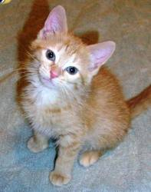

In [10]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [19]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [29]:
uploader = SimpleNamespace(data = ["C:/desktop/kounde_sir_img/kitty-cat-kitten-pet-45201.jpeg"])

In [30]:
img =PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat ?: {is_cat}.")
print(f"Probablity it is a cat :{probs[1].item():.6f}")

Is this a cat ?: True.
Probablity it is a cat :1.000000


In [7]:
gv('''program[shape=box3d width=1 height=0.7]
input->program->results''')

NameError: name 'gv' is not defined

In [34]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


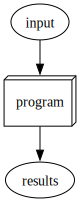

In [2]:
import os
from graphviz import Digraph

# Set the GRAPHVIZ_DOT environment variable to the path of dot.exe
os.environ["GRAPHVIZ_DOT"] = "C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Graphviz/dot.exe"

# Create a Digraph object
dot = Digraph()

# Add nodes and edges to the graph
dot.node('input')
dot.node('program', shape='box3d', width='1', height='0.7')
dot.node('results')
dot.edge('input', 'program')
dot.edge('program', 'results')

# Render and display the graph in the Jupyter Notebook
dot


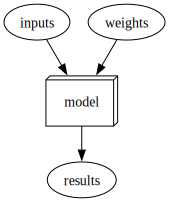

In [8]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph()

# Add nodes and edges to the graph
dot.node('model', shape='box3d', width='1', height='0.7')
dot.node('inputs')
dot.node('results')
dot.node('weights')
dot.edge('inputs', 'model')
dot.edge('model', 'results')
dot.edge('weights', 'model')

# Render and display the graph in the Jupyter Notebook
dot


In [1]:
from fastai.vision.all import*

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.fine_tune(1)

In [15]:
#IMAGE Recogniser for vehicle
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_p{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

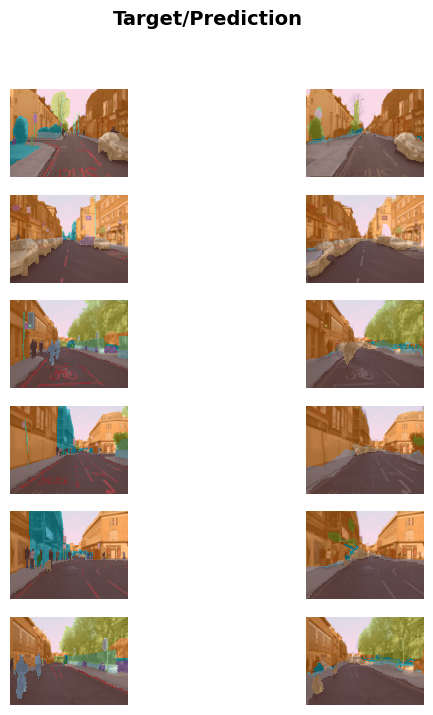

In [17]:
learn.show_results(max_n=6,figsize=(7,8))

In [ ]:
#Movie review
from fastai.text.all import*

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn .predict("I really liked that movie!")

In [9]:
#High income model
from fastai.tabular.all import*
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
    cat_names = ['workclass','education','marital-status','occupation',
                 'relationship','race'],
    ont_names = ['age','fnlwgt','education-num'],
    procs = [Categorify, FillMissing, Normalize])


learn = tabular_learner(dls, metrics=accuracy)

C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\tabular\core.py:273: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  store_attr(but='to', means=dict(getattr(to, 'train', to).conts.mean()),
C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\tabular\core.py:274: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stds=dict(getattr

ValueError: Unable to coerce to Series, length must be 8: given 6

In [12]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [13]:
learn.fit_one_cycle(3)

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


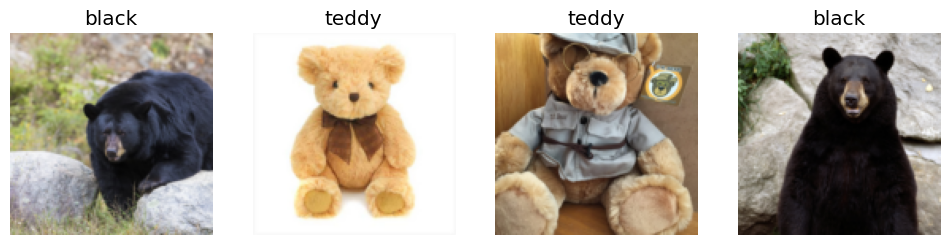

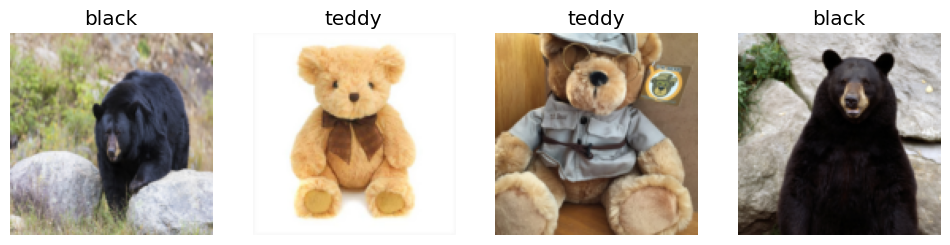

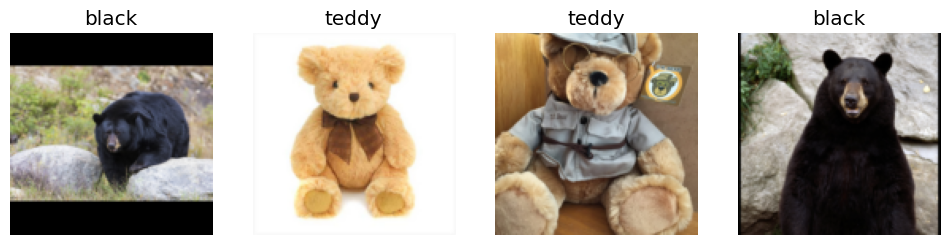

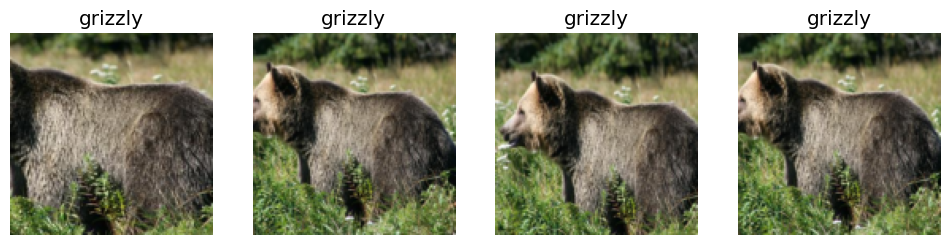

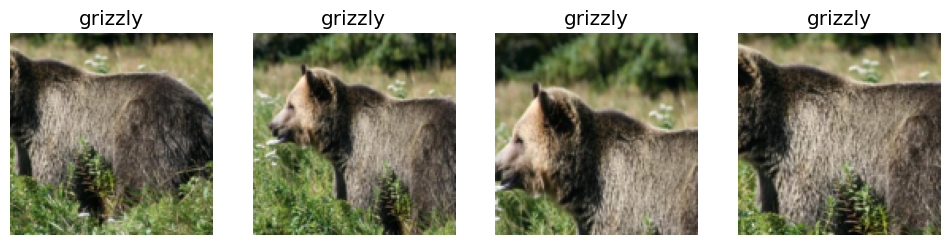

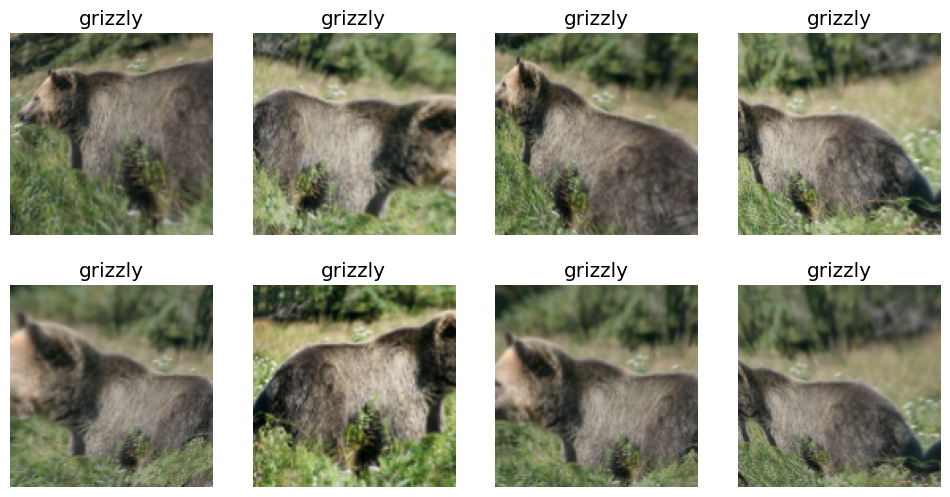

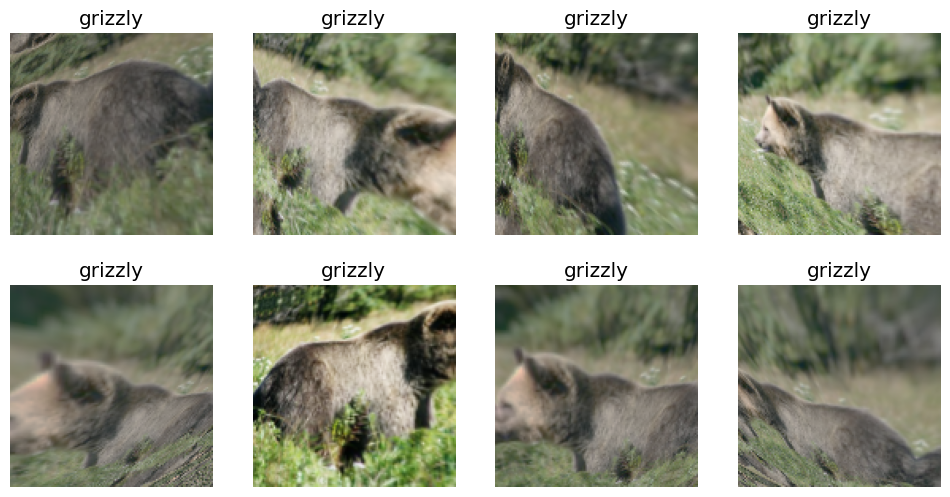

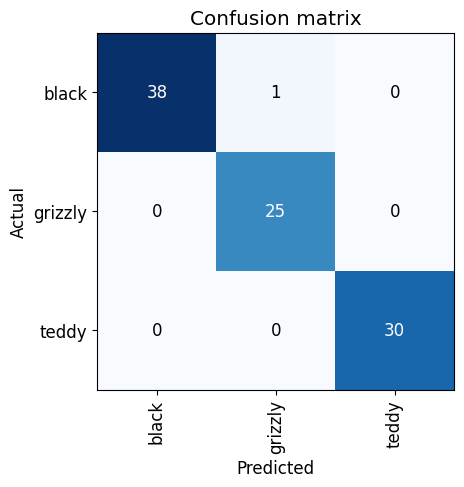

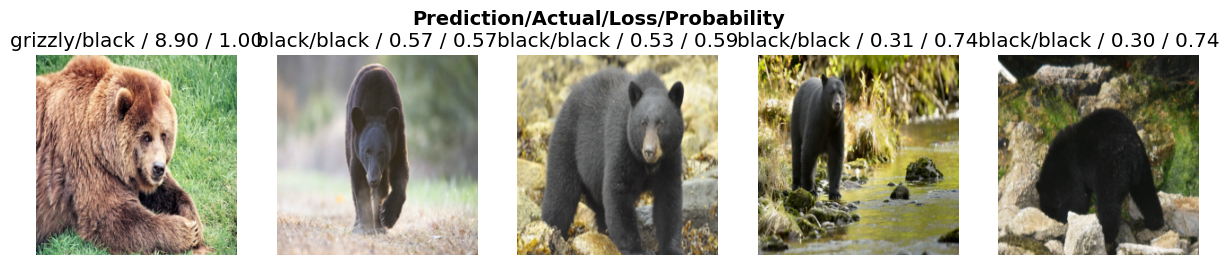

In [1]:

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

search_images_ddg

ims = search_images_ddg('grizzly bear')
len(ims)

dest = 'image/grizzly.jpg'
download_url(ims[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(128,128)

bear_types = 'grizzly' ,'black','teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

fns = get_image_files(path)
fns

failed = verify_images(fns)
failed

failed.map(Path.unlink);

doc(verify_images)

class DataLoaders(GetAttr):
  def _init_(self, *loaders): self.loaders = loaders
  def _getitem_(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

blocks=(ImageBlock,CategoryBlock)

get_items=get_image_files

splitter=RandomSplitter(valid_pct=0.2, seed=12)

get_y=parent_label

item_tfms=Resize(128)

dls = bears.dataloaders(path)

dls.valid.show_batch(max_n=4,nrows=1)

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad,pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

interp.plot_top_losses(5,nrows=1)

cleaner = ImageClassifierCleaner(learn)
cleaner



In [2]:
for idx in cleaner.delete():cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

for idx,cat in cleaner.change():shutil.move(str(cleaner.fns[idx]),path/cat)

learn.export()

path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

learn_inf.predict('image/grizzly.jpg')

('grizzly', tensor(1), tensor([0.0113, 0.9867, 0.0020]))

In [3]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
#model finishes here and deployment starts

In [ ]:
# Install ipywidgets
!pip install ipywidgets

# Enable and install the widget extension
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

# Install Voilà
!pip install voila



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\aman mhendiratta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Enabling notebook extension jupyter-js-widgets/extension...
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts\jupyter-nbextension.EXE\__main__.py", line 7, in <module>
  File "C:\Users\aman mhendiratta\AppData\Local\Packages\PythonSoftwareFoundation.Pyt

In [4]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [9]:
img = PILImage.create(btn_upload.data[-1])

In [12]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [13]:
pred,pred_idx,probs = learn_inf.predict(img)

In [14]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9867')

In [15]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [16]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [17]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [18]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [19]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

  Obtaining dependency information for voila from https://files.pythonhosted.org/packages/25/28/7b9d6c2597bd86b25936df550f9b88319ee79721f095c90dca822c053692/voila-0.5.5-py3-none-any.whl.metadata
  Using cached voila-0.5.5-py3-none-any.whl.metadata (9.0 kB)
  Obtaining dependency information for jupyterlab-server<3,>=2.3.0 from https://files.pythonhosted.org/packages/a2/97/abbbe35fc67b6f9423309988f2e411f7cb117b08321866d3d8b720f4c0d4/jupyterlab_server-2.25.2-py3-none-any.whl.metadata
  Using cached jupyterlab_server-2.25.2-py3-none-any.whl.metadata (5.9 kB)
  Obtaining dependency information for websockets>=9.0 from https://files.pythonhosted.org/packages/41/b0/5ec054cfcf23adfc88d39359b85e81d043af8a141e3ac8ce40f45a5ce5f4/websockets-12.0-cp310-cp310-win_amd64.whl.metadata
  Using cached websockets-12.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Obtaining dependency information for babel>=2.10 from https://files.pythonhosted.org/packages/86/14/5dc2eb02b7cc87b2f95930310a2cc5229198414919a

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.12.0 requires tensorboard-data-server<0.8.0,>=0.7.0, but you have tensorboard-data-server 0.6.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.11.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\aman mhendiratta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Enabling: voila
- Writing config: C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\etc\jupyter
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_mod